# Navigation - Project 1

---
This notebook we train an agent based on the DQN - Algorithm describe on the following ["paper"](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf). The goal consists in training a agent to be able to capture as many __yellow bananas__ as possible, while __avoiding blue bananas__ (_yellow bananas_ give a reward of +1 and _blue bananas_ a reward of -1)

## 0| Environement
Load all required packages and the "Banana" [unity environement](https://github.com/Unity-Technologies/ml-agents).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt
from _001_dqn_agent import Agent
from collections import deque

# Load Banana environement
env = UnityEnvironment(file_name="Banana.app")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## 1| DQN - Agent Training

In [2]:
def dqn(n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, train=True):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train (bool): added toggler to activate train or evaluate mode
    """
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon

    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0

        while True:
            # Agent decision and interaction
            action = agent.act(state)
            env_info = env.step(action)[brain_name]

            # Feedback on action
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]

            # Update values
            if train:
                agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward

            if done:
                break

        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn.pth') # Save model

    return scores

Episode 100	Average Score: 1.22
Episode 200	Average Score: 3.59
Episode 300	Average Score: 8.43
Episode 400	Average Score: 11.72
Episode 500	Average Score: 14.61
Episode 600	Average Score: 16.31
Episode 700	Average Score: 16.64
Episode 800	Average Score: 15.93
Episode 900	Average Score: 16.32
Episode 1000	Average Score: 16.70
Episode 1100	Average Score: 16.54
Episode 1200	Average Score: 15.94
Episode 1300	Average Score: 16.98
Episode 1400	Average Score: 16.65
Episode 1500	Average Score: 15.76
Episode 1600	Average Score: 15.47
Episode 1700	Average Score: 17.27
Episode 1800	Average Score: 17.20
Episode 1900	Average Score: 16.47
Episode 2000	Average Score: 16.44


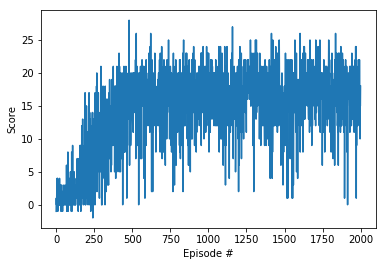

In [3]:
agent = Agent(state_size=37, action_size=4, seed=0)
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Conclusions:
We can observe that the algorithm reaches the _required_ performance by a point between the __400 - 500 episodes__, and that further training _increases the performance_. Till a point where the agent starts to down perform. This may be caused by the _Neural network_ starting to __overfit__.

## 2| DQN - Agent Run

In [7]:
agent = Agent(state_size=37, action_size=4, seed=0, weights_file='checkpoint_dqn.pth')
scores = dqn(n_episodes=100, train=False)

Episode 100	Average Score: 16.58


## 3| Close Environement

In [8]:
env.close()